In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_08102_jpg.rf.6667f43d90807f9616d8f0cc3b851453.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07225_jpg.rf.0d080812730dd55dfdbf891d1bed0aff.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07215_jpg.rf.3efc6ce63b59076891085ff68080fdea.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07223_jpg.rf.778c944cc99adfd048e1b60bb42bb039.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07229_jpg.rf.b0dd529f99317f18e2f1ab717de5252e.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07201_jpg.rf.32a78d4516736dab64c75a1697570b67.jpg
/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid/7/image_07230_jpg.rf.4bd95b0dd0098d92dea5da296f365942.jpg
/kaggle/input/flower-classificatio

# **Table of Contents**
---------------------------
✅ **Import Libraries.**   
✅ **Data Import.**   
✅ **Data Visualization.**   
✅ **Modeling & Prediction.**   
✅ **Evaluation.**   

# **1. Import Libraries.**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

from sklearn.model_selection import train_test_split

In [16]:
# Set the device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **2. Data Import.**

In [17]:
train_dir = '/kaggle/input/flower-classification-dataset/Flower Classification Dataset/train'
test_dir = '/kaggle/input/flower-classification-dataset/Flower Classification Dataset/test'
val_dir = '/kaggle/input/flower-classification-dataset/Flower Classification Dataset/valid'

In [18]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [19]:
batch_size = 32

train_ds = torchvision.datasets.ImageFolder(
    train_dir, transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, shuffle=True
)


val_ds = torchvision.datasets.ImageFolder(
    val_dir, transform=transform 
)

val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=batch_size, shuffle=True
)


test_ds = torchvision.datasets.ImageFolder(
    train_dir, transform=transform 
)

test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=batch_size, shuffle=True
)


# **3. Data Visualization**

In [20]:
for batch_images, labels in train_loader:
    break  


print('Labels:', labels)
unique_classes = len(set(labels.numpy()))
print(f'Total Number of Classes in this Batch: {unique_classes}')

Labels: tensor([47, 26, 97, 65, 82, 26, 40, 13, 86, 93, 33, 92, 56, 51, 20, 54,  4, 69,
        17, 76, 83, 10, 64, 73, 74, 50, 67,  6, 78, 40, 22, 90])
Total Number of Classes in this Batch: 30


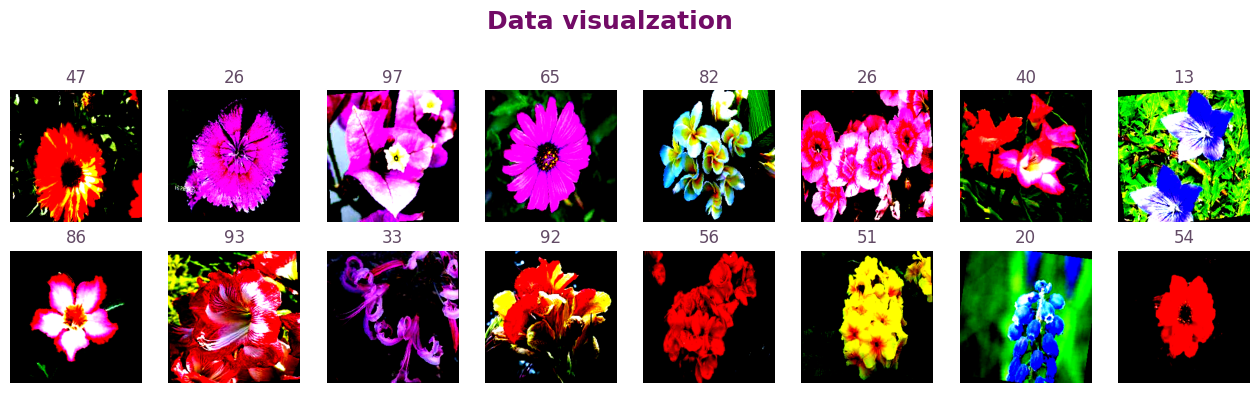

In [21]:
plt.figure(figsize=(16, 8))
plt.suptitle('Data visualzation', fontsize=18, fontweight='bold', color='#720b66')


for i in range(16):
    ax = plt.subplot(4, 8, i + 1)
    img = torch.permute(batch_images[i], (1, 2, 0))
    plt.imshow(img)
    
    
    label = int(labels[i])
    
    
    plt.title(label, color='#634b66')
    plt.axis('off')
    
plt.show()

# **4. Modleing & Prediction.**

In [22]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = CNN(num_classes=102)
model.to(device)


#model = CNN(unique_classes)
#dgpu = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#model.to(dgpu)

CNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=100352, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=102, bias=True)
  )
)

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [24]:
'''
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
# Training loop
num_epochs = 5
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2%}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}')

    
    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')
'''

"\ntrain_losses = []\nval_losses = []\ntrain_accuracies = []\nval_accuracies = []\n# Training loop\nnum_epochs = 5\nbest_val_accuracy = 0.0\n\nfor epoch in range(num_epochs):\n    model.train()\n    train_loss = 0.0\n    correct = 0\n    total = 0\n    \n    for batch_idx, (inputs, labels) in enumerate(train_loader):\n        inputs, labels = inputs.to(device), labels.to(device)\n        \n        optimizer.zero_grad()\n        outputs = model(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n        \n        train_loss += loss.item()\n        _, predicted = torch.max(outputs, 1)\n        total += labels.size(0)\n        correct += (predicted == labels).sum().item()\n    \n    train_accuracy = correct / total\n    train_losses.append(train_loss)\n    train_accuracies.append(train_accuracy)\n    \n    # Validation\n    model.eval()\n    val_loss = 0.0\n    correct = 0\n    total = 0\n    \n    with torch.no_grad():\n        for input

In [28]:
from datetime import datetime

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs for training
num_epochs = 20


train_losses = np.zeros(num_epochs)
val_losses = np.zeros(num_epochs)
train_accs = np.zeros(num_epochs)
val_accs = np.zeros(num_epochs)

for epoch in range(num_epochs):
    model.train() 
    t0 = datetime.now()
    
    train_loss = []
    val_loss = []
    n_correct_train = 0
    n_total_train = 0

    
    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)

        
        optimizer.zero_grad()
 
        y_pred = model(images)
        loss = criterion(y_pred, labels)  

        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

        # Compute training accuracy
        _, predicted_labels = torch.max(y_pred, 1)
        n_correct_train += (predicted_labels == labels).sum().item()
        n_total_train += labels.shape[0]

    train_loss = np.mean(train_loss)
    train_losses[epoch] = train_loss
    train_accs[epoch] = n_correct_train / n_total_train

    # Validation phase
    model.eval()  
    n_correct_val = 0
    n_total_val = 0
    with torch.no_grad():  
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            y_pred = model(images)
            loss = criterion(y_pred, labels)

            # Store the validation loss
            val_loss.append(loss.item())

            # Compute validation accuracy
            _, predicted_labels = torch.max(y_pred, 1)
            n_correct_val += (predicted_labels == labels).sum().item()
            n_total_val += labels.shape[0]

    val_loss = np.mean(val_loss)
    val_losses[epoch] = val_loss
    val_accs[epoch] = n_correct_val / n_total_val
    duration = datetime.now() - t0

    # Print the metrics for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accs[epoch]:.4f} | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accs[epoch]:.4f} | '
          f'Duration: {duration}')

# Optionally, save the model after training
torch.save(model.state_dict(), "flower_classification_model.pth")

Epoch [1/20] - Train Loss: 3.6128, Train Accuracy: 0.1443 | Val Loss: 3.2395, Val Accuracy: 0.1834 | Duration: 0:00:30.101146
Epoch [2/20] - Train Loss: 2.8661, Train Accuracy: 0.2804 | Val Loss: 2.8842, Val Accuracy: 0.2826 | Duration: 0:00:18.952863
Epoch [3/20] - Train Loss: 2.3819, Train Accuracy: 0.3764 | Val Loss: 2.6842, Val Accuracy: 0.3301 | Duration: 0:00:19.051011
Epoch [4/20] - Train Loss: 1.9985, Train Accuracy: 0.4661 | Val Loss: 2.4629, Val Accuracy: 0.3687 | Duration: 0:00:18.132060
Epoch [5/20] - Train Loss: 1.6583, Train Accuracy: 0.5478 | Val Loss: 2.5258, Val Accuracy: 0.3726 | Duration: 0:00:18.259471
Epoch [6/20] - Train Loss: 1.4346, Train Accuracy: 0.6041 | Val Loss: 2.4658, Val Accuracy: 0.3932 | Duration: 0:00:18.198563
Epoch [7/20] - Train Loss: 1.2386, Train Accuracy: 0.6521 | Val Loss: 2.5894, Val Accuracy: 0.3878 | Duration: 0:00:19.057005
Epoch [8/20] - Train Loss: 1.0754, Train Accuracy: 0.6972 | Val Loss: 2.4996, Val Accuracy: 0.4137 | Duration: 0:00:19

# **5. Evaluation**

In [30]:
history = {
    'Train_Loss': train_losses,
    'Validation_Loss': val_losses,
    'Train_Accuracy': train_accs,
    'Validation_Accuracy': val_accs,
    'Duration': duration
}

result_df = pd.DataFrame(history)

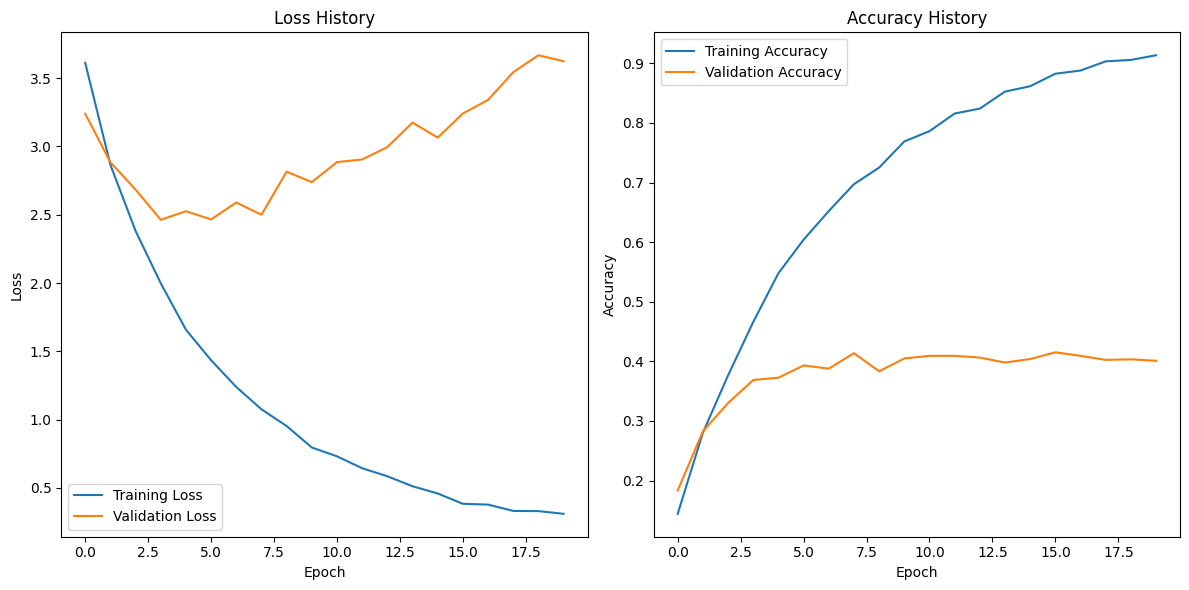

In [32]:
# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy History')

plt.tight_layout()
plt.show()

-----------------
**Thankyou. Please leave your advice in the comments.**